<h1 style="color: #001a79;">Topic 1 - Statistics</h1>

In [77]:
# Access to the mathematical functions defined by the C standard.
import math 

# Iterate over data structures that can be stepped over using a for-loop. 
import itertools

# For doing (pseudo-) random things in Python.
import random

# Specialized container datatypes.
from collections import Counter

# Mains statistics package.
from scipy.stats import hypergeom
from scipy.stats import fisher_exact
from scipy import stats
import scipy.stats as ss

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

The exercise in <a href="https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/01-statistics.ipynb" target="_blank">01-statistics</a> gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

The general formula is: $${n \choose r} = {n! \over r!(n-r)!}$$

where n is the number of things to choose from, and we choose r of them. 

Source: <a href="https://www.mathsisfun.com/combinatorics/combinations-permutations.html" target="_blank">Math is Fun: Combinations and Permutations
</a>

Below shows the calculation for the number of ways of selecting 4 cups from 8.

$${8 \choose 4} = {8! \over 4!(8-4)!} = {8! \over (4!)(4!)} = 70$$

In [2]:
res1 = math.comb(8, 4)
print("Number of ways:", res1)

Number of ways: 70


Source: <a href="https://stackoverflow.com/a/4941932" target="_blank">Stackoverflow: math.comb</a>

Therefore, the probability of randomly selecting 4 correct cups from 8 if the lady were simply guessing is 1.4%.

We want to calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%. 

To do this we can use Pascal's Triangle. 

The values of the triangle are the values for n choose r, where the rows are n from 0 to 10, and from left to right of each row is r where 0 $\le$ r $\le$ n. 

$${0 \choose 0}$$
$${1 \choose 0} {1 \choose 1}$$
$${2 \choose 0} {2 \choose 1} {2 \choose 2}$$
$${3 \choose 0} {3 \choose 1} {3 \choose 2} {3 \choose 3}$$
$$...$$
$$...$$
$$...$$
$${8 \choose 0} {8 \choose 1} {8 \choose 2} {8 \choose 3} {8 \choose 4} {8 \choose 5} {8 \choose 6} {8 \choose 7} {8 \choose 8}$$
$${9 \choose 0} {9 \choose 1} {9 \choose 2} {9 \choose 3} {9 \choose 4} {9 \choose 5} {9 \choose 6} {9 \choose 7} {9 \choose 8} {9 \choose 9}$$
$${10 \choose 0} {10 \choose 1} {10 \choose 2} {10 \choose 3} {10 \choose 4} {10 \choose 5} {10 \choose 6} {10 \choose 7} {10 \choose 8} {10 \choose 9} {10 \choose 10}$$

In [3]:
N = 10
n_list = []
for n in range(N+1):
    r_list = []
    for r in range(n+1):
        ncr = math.comb(n,r)
        r_list.append(ncr)
    n_list.append(r_list)
    
n_list

# Print Pascals Triangle 
for i in range(len(n_list)):
    print("    "*(len(n_list)-i) ,end=" ",sep=" ")
    for j in range(0,i+1):
        print("{0:6}".format(n_list[i][j]),end=" ",sep=" ")
    print("        <------", i, "cups")
    print()

                                                  1         <------ 0 cups

                                              1      1         <------ 1 cups

                                          1      2      1         <------ 2 cups

                                      1      3      3      1         <------ 3 cups

                                  1      4      6      4      1         <------ 4 cups

                              1      5     10     10      5      1         <------ 5 cups

                          1      6     15     20     15      6      1         <------ 6 cups

                      1      7     21     35     35     21      7      1         <------ 7 cups

                  1      8     28     56     70     56     28      8      1         <------ 8 cups

              1      9     36     84    126    126     84     36      9      1         <------ 9 cups

          1     10     45    120    210    252    210    120     45     10      1         <------ 10 cups

Source: <a href="https://www.pythonpool.com/pascals-triangle-python/" target="_blank">Print Pascals Triangle</a>

We can then divide 1 / (the number of combinations) to give us the probability of guessing randomly

In [4]:
N = 10
n_list = []
for n in range(N+1):
    r_list = []
    for r in range(n+1):
        ncr = math.comb(n,r)
        prob = 1 / ncr
        per = prob * 100
        r_list.append(round(per,1))
    n_list.append(r_list)
    
n_list

# Print Pascals Triangle https://www.pythonpool.com/pascals-triangle-python/
for i in range(len(n_list)):
    print("    "*(len(n_list)-i) ,end=" ",sep=" ")
    for j in range(0,i+1):
        print("{0:6}".format(n_list[i][j]),end=" ",sep=" ")
    print("        <------", i, "cups")
    print()

                                              100.0         <------ 0 cups

                                          100.0  100.0         <------ 1 cups

                                      100.0   50.0  100.0         <------ 2 cups

                                  100.0   33.3   33.3  100.0         <------ 3 cups

                              100.0   25.0   16.7   25.0  100.0         <------ 4 cups

                          100.0   20.0   10.0   10.0   20.0  100.0         <------ 5 cups

                      100.0   16.7    6.7    5.0    6.7   16.7  100.0         <------ 6 cups

                  100.0   14.3    4.8    2.9    2.9    4.8   14.3  100.0         <------ 7 cups

              100.0   12.5    3.6    1.8    1.4    1.8    3.6   12.5  100.0         <------ 8 cups

          100.0   11.1    2.8    1.2    0.8    0.8    1.2    2.8   11.1  100.0         <------ 9 cups

      100.0   10.0    2.2    0.8    0.5    0.4    0.5    0.8    2.2   10.0  100.0         <------ 10 cups

If we lower the number of cups in the experiment to 7, 4 with milk in first and 3 with tea first, we can see the probability will go up. The number of ways of selecting the cups decreases so the probability of selecting the correct cups increases. 

In [5]:
res2 = math.comb(7, 4)
per2 = round((1/res2)*100,1)

print("Number of ways:", res2)
print("Probability: ", per2, "%", sep="")

Number of ways: 35
Probability: 2.9%


If we increase the number of cups in the experiment to 9, 4 with milk in first and 5 with tea first, we assume the probability will go up. 

In [6]:
res3 = math.comb(9, 4)
per3 = round((1/res3)*100,1)

print("Number of ways:", res3)
print("Probability: ", per3, "%", sep="")

Number of ways: 126
Probability: 0.8%


As expected the number of ways of selecting the cups increases so the probability of selecting the correct cups decreases. This time to 0.8% which is below the 1%. 

To note, when the sample of the experiment is odd, as is the case here, 9 Choose 4 is the same as 9 Choose 5 

i.e. if the lady has to choose the 4 cups with milk, that means she has to choose 5 cups which the milk was added second. 

In [7]:
res4 = math.comb(9, 5)
per4 = round((1/res4)*100,1)

per3 == per4

True

For the experiment it might make sense that we have an even number of cups with milk in first and tea in first respectively. 

In [8]:
res5 = math.comb(10, 5)
per5 = round((1/res5)*100,1)

print("Number of ways:", res5)
print("Probability: ", per5, "%", sep="")

Number of ways: 252
Probability: 0.4%


<h3 style="color: #001a79;">Exercise 1 Continued</h3>

<hr style="border-top: 1px solid #001a79;" />

*Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?


In [9]:
# Number cups from 1 to num
def getCups(num):
    cups = list(range(num))
    return cups

In [10]:
# Get the list of combinations 
def getPoss(num, choice):
    cups = getCups(num)
    poss = list(itertools.combinations(cups, choice))
    return poss

In [11]:
# Calculates the number of ways of guessing for each number of correct cups.
def experiment(num, choice):
    # Pick a random correct answer from the list of possible iterations to simulate the experiment.
    correct = set(random.choice(getPoss(num, choice)))

    # Count the overlap between the correct answer, and each of the possiblities.
    counts = [len(correct & set(i)) for i in itertools.combinations(getCups(num), choice)]

    # Returns a dict of the counts for each value.
    return Counter(counts) #https://stackoverflow.com/a/5829377

In [12]:
# Calculates the proportions of ways of guessing for each number of correct cups.
def getProportion(counts):
    total = sum(counts.values())
    for k,v in counts.items():
        counts[k] = v/total
    return counts
getProportion(experiment(8, 4))

Counter({3: 0.22857142857142856,
         2: 0.5142857142857142,
         1: 0.22857142857142856,
         4: 0.014285714285714285,
         0: 0.014285714285714285})

In [13]:
# Calculates the proportions of guessing one wrong cup and the correct cup.
def getProbabilty(num_of_cups, half_num):
    counts = experiment(num_of_cups, half_num)
    x = getProportion(counts)
    total = x[half_num] + x[half_num - 1]
    return total

In [14]:
# Prints number of cups and probability 
def printProbability(num_of_cups):
    half_num = math.floor(num_of_cups/2)
    prob = getProbabilty(num_of_cups, half_num) * 100
    print("Number of cups:", num_of_cups)
    print("Probaility of guessing at least:", half_num-1, "cups")
    print("Probability: ", prob, "%", sep="")

If we limit the number of cups in an experiment to even numbers. 

We ask the lady to guess half correctly but allow her to get one wrong. 

We can see as we increase the number of cups the probabilty of her guessing correctly decreases. 

In [15]:
for i in range(4, 18, 2):
    printProbability(i)
    print("-------------------")

Number of cups: 4
Probaility of guessing at least: 1 cups
Probability: 83.33333333333333%
-------------------
Number of cups: 6
Probaility of guessing at least: 2 cups
Probability: 50.0%
-------------------
Number of cups: 8
Probaility of guessing at least: 3 cups
Probability: 24.285714285714285%
-------------------
Number of cups: 10
Probaility of guessing at least: 4 cups
Probability: 10.317460317460316%
-------------------
Number of cups: 12
Probaility of guessing at least: 5 cups
Probability: 4.004329004329004%
-------------------
Number of cups: 14
Probaility of guessing at least: 6 cups
Probability: 1.456876456876457%
-------------------
Number of cups: 16
Probaility of guessing at least: 7 cups
Probability: 0.505050505050505%
-------------------


The probability of guessing at least 7 cups from 16 is 0.5% which would maintain the 1% threshold. 

<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

Our hypothesis is that the lady cannot tell the difference between a cup of tea that had milk in it first and one that had the tea in it first. 

**Null Hypothesis**: the lady can not tell if the cup had milk in it first or last.

**Alternative Hypothesis**: the lady can tell. 

We will reject the null hypothesis if the p-value < 0.05. 

In our experiment the lady picked all 8 cups of tea correctly. This can be seen in the contigency table below. 

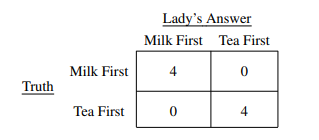
Source: <a href="https://www.cs.utah.edu/~jeffp/teaching/cs3130/lectures/L15-HypothesisTests1.pdf" target="_blank">The University of Utah Notes: Hypothesis Testing, Fisher’s Exact Test</a>

Under the null hypothesis (that she is guessing) we can calculate the probabilities that she guesses milk first correctly: 

- No cups correctly p(0)
- 1 cup correctly p(1)
- 2 cups correctly p(2)
- 3 cups corrently p(3)
- 4 cups correctly p(4)

The probability of each possibility is given by the hypergeometric distribution. These can be computed as: 

In [16]:
table = np.array([[4, 0], [0, 4]])
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
probs = hypergeom.pmf(np.arange(start, end+1), M, n, N)

In [16]:
for i in range(len(probs)):
    print(f"p({i}) = {round(probs[i],3)}")

p(0) = 0.014
p(1) = 0.229
p(2) = 0.514
p(3) = 0.229
p(4) = 0.014


Using scipy's version of Fisher's exact test we can calculate the p-value. 

In [18]:
# We use alternative='greater' because it is a one sided test. 
oddsratio, pvalue = fisher_exact([[4, 0], [0, 4]], alternative='greater')

In [19]:
pvalue

0.014285714285714268

In [20]:
1/70

0.014285714285714285

<h3 style="color: #001a79;">Exercise 3</h3>

<hr style="border-top: 1px solid #001a79;" />

Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

In [18]:
# Sets rng to a random generator 
rng = np.random.default_rng()

***rng*** is can be used to generate random numbers. 

**Example 1**: To generate numbers random floats - <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random" target="_blank">numpy.random.Generator.random</a>

In [19]:
# Generate an array of 5 random float numbers between 0-10
arr1 = rng.random(5)*10
arr1

array([3.03673772, 9.00954497, 8.87128736, 2.06950627, 9.1395235 ])

**Example 2**: To generate random integers - <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers" target="_blank">numpy.random.Generator.integers</a>. 

In [25]:
# Generate an array of 5 random integer numbers between 0-10
arr2 = rng.integers(0, 11, 5)
arr2

array([ 4,  2,  3,  1, 10], dtype=int64)

**Example 3**: To generate random numbers from a normal distribution - <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html" target="_blank">numpy.random.Generator.normal</a>. 

In [28]:
mu1 = 0
sigma1 = 1
x1 = rng.normal(loc=mu, scale=sigma, size=10000)

To generate the same using scipy.stats - <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html" target="_blank">scipy.stats.norm</a>

In [36]:
mu2 = 1
sigma2 = 1
x2 = stats.norm.rvs(loc=mu2, scale=sigma2, size=10000, random_state=rng)

In [37]:
# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

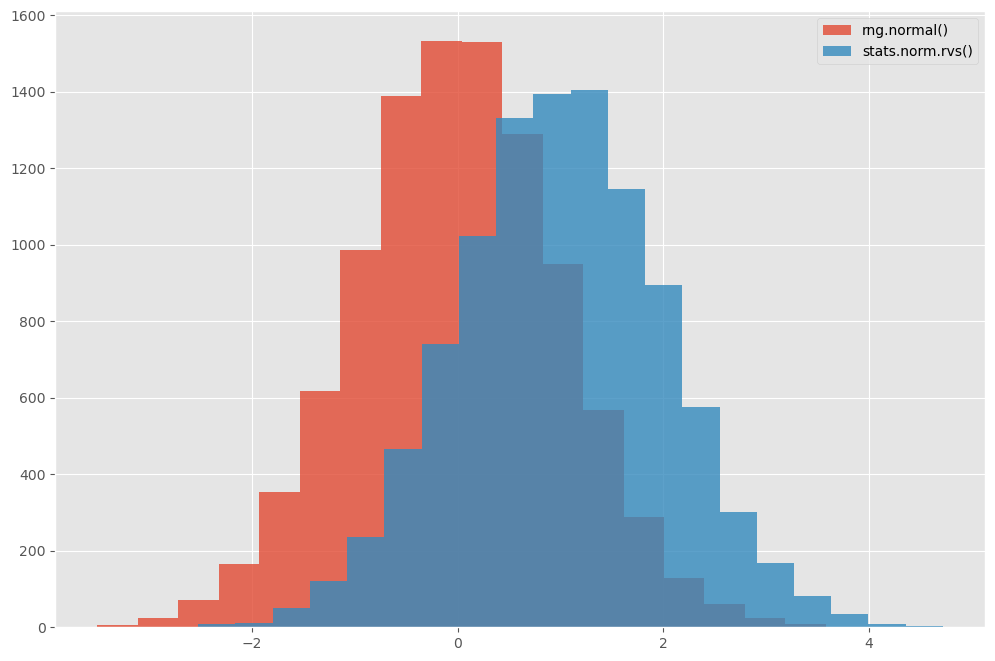

In [38]:
plt.hist(x1, bins=20, label="rng.normal()", alpha=0.8)
plt.hist(x2, bins=20, label="stats.norm.rvs()", alpha=0.8)
plt.legend()
plt.show()

***

We will explore the population samples below where:

- **m**: mean
- **s**: standard deviation
- **n**: sample size

In [39]:
pop1 = {"pop": "Population 1", 'm': 5, 's': 10, 'n': 500, 'color':'g'}
pop2 = {"pop": "Population 2", 'm': 5, 's': 10, 'n': 500, 'color':'b'}
pop3 = {"pop": "Population 3", 'm': 5, 's': 20, 'n': 500, 'color':'r'}
pop4 = {"pop": "Population 4", 'm': 5, 's': 20, 'n': 100, 'color':'m'}
pop5 = {"pop": "Population 5", 'm': 8, 's': 20, 'n': 100, 'color':'y'}

In [40]:
# Creates an array of 'n' random numbers with mean 'm' and standard deviation 's'
def randomVariables(pop):
    rvs = stats.norm.rvs(loc=pop['m'], scale=pop['s'], size=pop['n'], random_state=rng)
    return rvs

In [41]:
# Plots one populations histogram and pdf versus anothers. 
def plotPop(popA, rvsA, popB, rvsB):
    # Create two samples, one from each population.
    sampA = rvsA
    sampB = rvsB
    
    samp_all = np.concatenate((sampA, sampB))
    min_val = min(samp_all)
    max_val = max(samp_all)
    
    # x values for plotting.
    x = np.linspace(min_val, max_val, 1000)

    # The probability density functions (PDFs) for the two populations.
    pdfA = stats.norm.pdf(x, popA['m'], popA['s'])
    pdfB = stats.norm.pdf(x, popB['m'], popB['s'])

    # Plot the population PDFs as shaded regions.
    plt.fill_between(x, pdfA, color=popA["color"], alpha=0.25, label=popA["pop"])
    plt.fill_between(x, pdfB, color=popB["color"], alpha=0.25, label=popB["pop"])

    # Plot histograms of the two samples.
    plt.hist(sampA, density=True, color=popA["color"], alpha=0.25)
    plt.hist(sampB, density=True, color=popB["color"], alpha=0.25)

    # Display a legend.
    plt.legend()
    plt.show()

***1. Test 2 samples with identical means, standard deviations and sample sizes:***
***

In [42]:
print(f'{pop1["pop"]}\t mean:{pop1["m"]}\t standard deviation:{pop1["s"]}\t sample size:{pop1["n"]}')
print(f'{pop2["pop"]}\t mean:{pop2["m"]}\t standard deviation:{pop2["s"]}\t sample size:{pop2["n"]}')

Population 1	 mean:5	 standard deviation:10	 sample size:500
Population 2	 mean:5	 standard deviation:10	 sample size:500


In [43]:
# Creates two arrays of rvs from pop1 and pop2
rvs1 = randomVariables(pop1)
rvs2 = randomVariables(pop2)

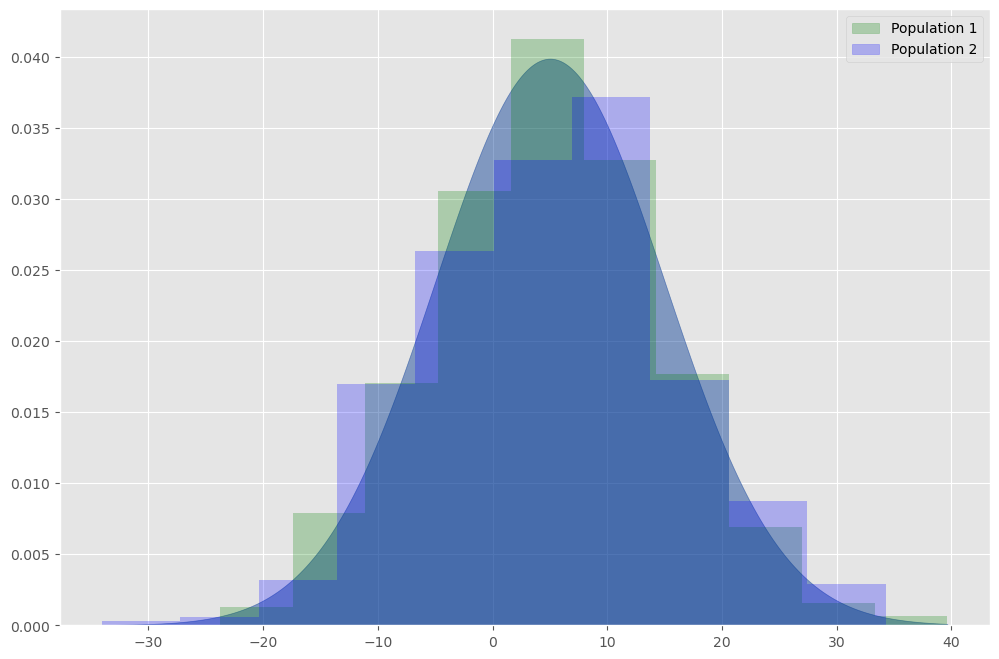

In [44]:
plotPop(pop1, rvs1, pop2, rvs2)

In [45]:
# Runs scipy stats individual samples t-test where variances are assumed equal
t_12, p_12 = stats.ttest_ind(rvs1, rvs2)
print(f"T-Statistic: {t_12:.3f}\tP-Value: {p_12:.3f}")
print("Where variances are assumed equal")

T-Statistic: 0.010	P-Value: 0.992
Where variances are assumed equal


In [46]:
# Runs scipy stats individual samples t-test where variances are not assumed equal
t_12vf, p_12vf = stats.ttest_ind(rvs1, rvs2, equal_var=False)
print(f"T-Statistic: {t_12vf:.3f}\tP-Value: {p_12vf:.3f}")
print("Where variances are not assumed equal")

T-Statistic: 0.010	P-Value: 0.992
Where variances are not assumed equal


***2. Test 2 samples with identical means, different standard deviations and identical sample sizes:***
***

In [47]:
print(f'{pop1["pop"]}\t mean:{pop1["m"]}\t standard deviation:{pop1["s"]}\t sample size:{pop1["n"]}')
print(f'{pop3["pop"]}\t mean:{pop3["m"]}\t standard deviation:{pop3["s"]}\t sample size:{pop3["n"]}')

Population 1	 mean:5	 standard deviation:10	 sample size:500
Population 3	 mean:5	 standard deviation:20	 sample size:500


In [48]:
# Creates an arrays of rvs from pop3
rvs3 = randomVariables(pop3)

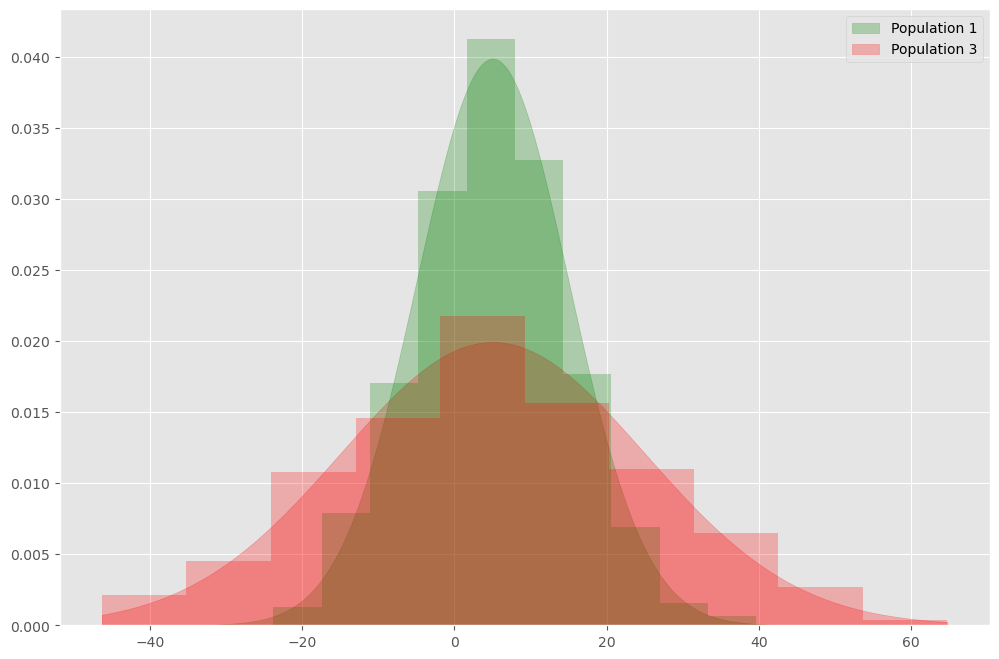

In [49]:
plotPop(pop1, rvs1, pop3, rvs3)

In [50]:
# Runs scipy stats individual samples t-test where variances are assumed equal
t_13, p_13 = stats.ttest_ind(rvs1, rvs3)
print(f"T-Statistic: {t_13:.3f}\tP-Value: {p_13:.3f}")
print("Where variances are assumed equal")

T-Statistic: -0.205	P-Value: 0.838
Where variances are assumed equal


In [51]:
# Runs scipy stats individual samples t-test where variances are not assumed equal
t_13vf, p_13vf = stats.ttest_ind(rvs1, rvs3, equal_var=False)
print(f"T-Statistic: {t_13vf:.3f}\tP-Value: {p_13vf:.3f}")
print("Where variances are not assumed equal")

T-Statistic: -0.205	P-Value: 0.838
Where variances are not assumed equal


ttest_ind underestimates p for unequal variances:

***3. Test 2 samples with identical means, different standard deviations and sample sizes:***
***

In [52]:
print(f'{pop1["pop"]}\t mean:{pop1["m"]}\t standard deviation:{pop1["s"]}\t sample size:{pop1["n"]}')
print(f'{pop4["pop"]}\t mean:{pop4["m"]}\t standard deviation:{pop4["s"]}\t sample size:{pop4["n"]}')

Population 1	 mean:5	 standard deviation:10	 sample size:500
Population 4	 mean:5	 standard deviation:20	 sample size:100


In [62]:
# Creates an arrays of rvs from pop4
rvs4 = randomVariables(pop4)

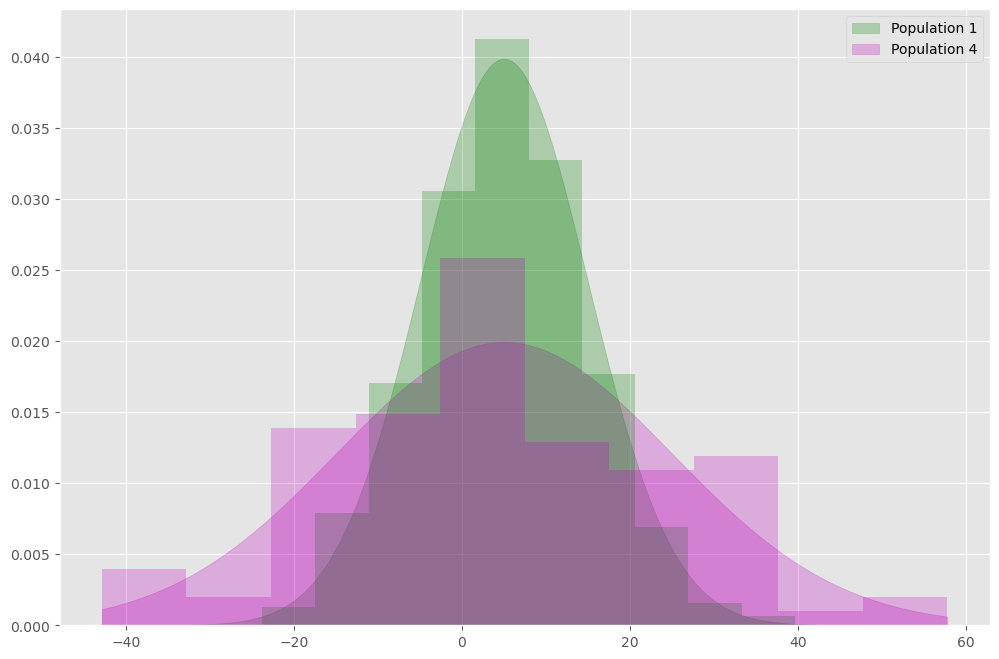

In [63]:
plotPop(pop1, rvs1, pop4, rvs4)

In [64]:
# Runs scipy stats individual samples t-test where variances are assumed equal
t_13, p_13 = stats.ttest_ind(rvs1, rvs4)
print(f"T-Statistic: {t_13:.3f}\tP-Value: {p_13:.3f}")
print("Where variances are assumed equal")

T-Statistic: 0.594	P-Value: 0.552
Where variances are assumed equal


In [65]:
# Runs scipy stats individual samples t-test where variances are not assumed equal
t_13vf, p_13vf = stats.ttest_ind(rvs1, rvs4, equal_var=False)
print(f"T-Statistic: {t_13vf:.3f}\tP-Value: {p_13vf:.3f}")
print("Where variances are not assumed equal")

T-Statistic: 0.395	P-Value: 0.694
Where variances are not assumed equal


When n1 != n2, the equal variance t-statistic is no longer equal to the unequal variance t-statistic:

***4. Test 2 samples with different means, standard deviations and sample sizes:***
***

In [69]:
print(f'{pop1["pop"]}\t mean:{pop1["m"]}\t standard deviation:{pop1["s"]}\t sample size:{pop1["n"]}')
print(f'{pop5["pop"]}\t mean:{pop5["m"]}\t standard deviation:{pop5["s"]}\t sample size:{pop5["n"]}')

Population 1	 mean:5	 standard deviation:10	 sample size:500
Population 5	 mean:8	 standard deviation:20	 sample size:100


In [70]:
# Creates an arrays of rvs from pop3
rvs5 = randomVariables(pop5)

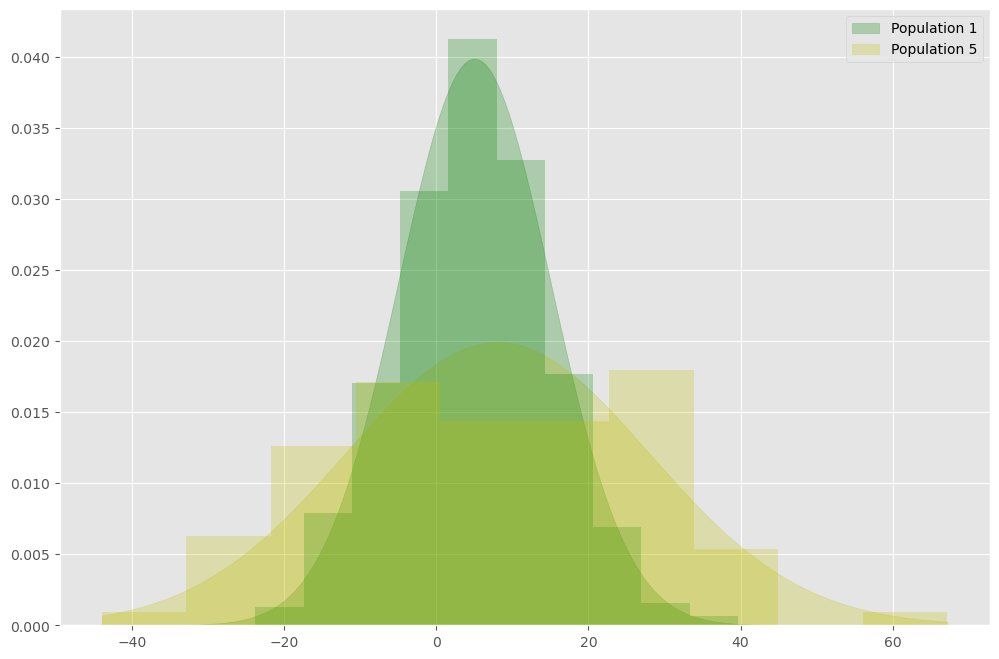

In [71]:
plotPop(pop1, rvs1, pop5, rvs5)

In [72]:
# Runs scipy stats individual samples t-test where variances are assumed equal
t_13, p_13 = stats.ttest_ind(rvs1, rvs5)
print(f"T-Statistic: {t_13:.3f}\tP-Value: {p_13:.3f}")
print("Where variances are assumed equal")

T-Statistic: -1.290	P-Value: 0.198
Where variances are assumed equal


In [73]:
# Runs scipy stats individual samples t-test where variances are not assumed equal
t_13vf, p_13vf = stats.ttest_ind(rvs1, rvs5, equal_var=False)
print(f"T-Statistic: {t_13vf:.3f}\tP-Value: {p_13vf:.3f}")
print("Where variances are not assumed equal")

T-Statistic: -0.840	P-Value: 0.403
Where variances are not assumed equal


When performing a permutation test, more permutations typically yields more accurate results. Use a <a href="https://numpy.org/doc/stable/reference/random/generator.html" target="_blank">np.random.Generator</a> to ensure reproducibility:

In [75]:
# Runs scipy stats individual samples t-test with 10,000 permutations. 
t_13, p_13 = stats.ttest_ind(rvs1, rvs5, permutations=10000, random_state=rng)
print(f"T-Statistic: {t_13:.3f}\tP-Value: {p_13:.3f}")

T-Statistic: -1.290	P-Value: 0.200


***

In [94]:
a = np.array([56, 128.6, 12, 123.8, 64.34, 78, 763.3])
b = np.array([1.1, 2.9, 4.2])

Take these two samples, one of which has an extreme tail.

In [95]:
np.sort(a)

array([ 12.  ,  56.  ,  64.34,  78.  , 123.8 , 128.6 , 763.3 ])

In [96]:
np.sort(b)

array([1.1, 2.9, 4.2])

In [97]:
a

array([ 56.  , 128.6 ,  12.  , 123.8 ,  64.34,  78.  , 763.3 ])

Use the trim keyword to perform a trimmed (Yuen) t-test. 

In [102]:
t_13, p_13 = stats.ttest_ind(a, b, trim=.2)
print(f"T-Statistic: {t_13:.3f}\tP-Value: {p_13:.3f}")

T-Statistic: 3.446	P-Value: 0.014


For example, using 20% trimming, `trim=.2`, the test will reduce the impact of one (`np.floor(trim*len(a))`) element from each tail of sample a. It will have no effect on sample b because `np.floor(trim*len(b))` is 0.

In [103]:
trim = 0.2

the test will reduce the impact of one element from each tail of sample a

In [104]:
np.floor(trim*len(a))

1.0

It will have no effect on sample b because

In [105]:
np.floor(trim*len(b))

0.0